<a href="https://colab.research.google.com/github/ibarajas248/proyecto_bootcamp_analisis_de_datos/blob/master/goles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 16.9 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector import Error

In [19]:
# prompt: mostrar tablas

import mysql.connector
from mysql.connector import Error
!pip install mysql-connector-python

try:
    # Establecer la conexión a la base de datos
    conn = mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos.')
        mycursor = conn.cursor()
        mycursor.execute("SHOW TABLES")
        for x in mycursor:
          print(x)
        # Aquí puedes ejecutar tus consultas SQL

except Error as e:
    print(f'Error al conectar a la base de datos: {e}')

"""
finally:
    if conn.is_connected():
        mycursor.close()
        conn.close()
        print('Conexión a la base de datos cerrada.')

"""

Conexión exitosa a la base de datos.
('estadisticas',)
('goles',)
('partidos',)


"\nfinally:\n    if conn.is_connected():\n        mycursor.close()\n        conn.close()\n        print('Conexión a la base de datos cerrada.')\n\n"

In [20]:
# prompt: dataframe partidos

import pandas as pd

try:
    # Establecer la conexión a la base de datos
    conn = mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos.')

        # Crear un DataFrame desde la tabla 'partidos'
        df_goles = pd.read_sql('SELECT * FROM goles', conn)


        df_goles.head()



except Error as e:
    print(f'Error al conectar a la base de datos: {e}')

Conexión exitosa a la base de datos.


<ipython-input-20-9ed1068d661a>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_goles = pd.read_sql('SELECT * FROM goles', conn)


In [21]:
df_goles.head(20)

,id,partido_id,jugador,equipo,minuto_marcaje
0,2793,10002,Julio Tavares,Dijon,NaN
1,2794,10002,Senou Coulibaly,Dijon,NaN
2,2795,10003,Sada Thioub,Nîmes,NaN
3,2796,10003,Florian Miguel,Nîmes,NaN
4,2797,10003,Clement Despres,Nîmes,NaN
5,2798,10003,Renaud Ripart,Nîmes,NaN
6,2799,10003,Romain Thomas,Nîmes,NaN
7,2800,10004,Grenier,Rennes,NaN
8,2801,10005,Moussa Doumbia,Stade de Reims,NaN
9,2802,10006,Marcus Thuram,Guingamp,NaN


In [22]:
df_goles.columns

Index(['id', 'partido_id', 'jugador', 'equipo', 'minuto_marcaje'], dtype='object')

jugador
Nicolas Pepe      6
Fekir             4
Cabella           4
Delort            4
Bahoken           3
Houssem Aouar     3
Ismaila Sarr      3
Oudin             3
Florent Mollet    3
Mothiba           3
dtype: int64


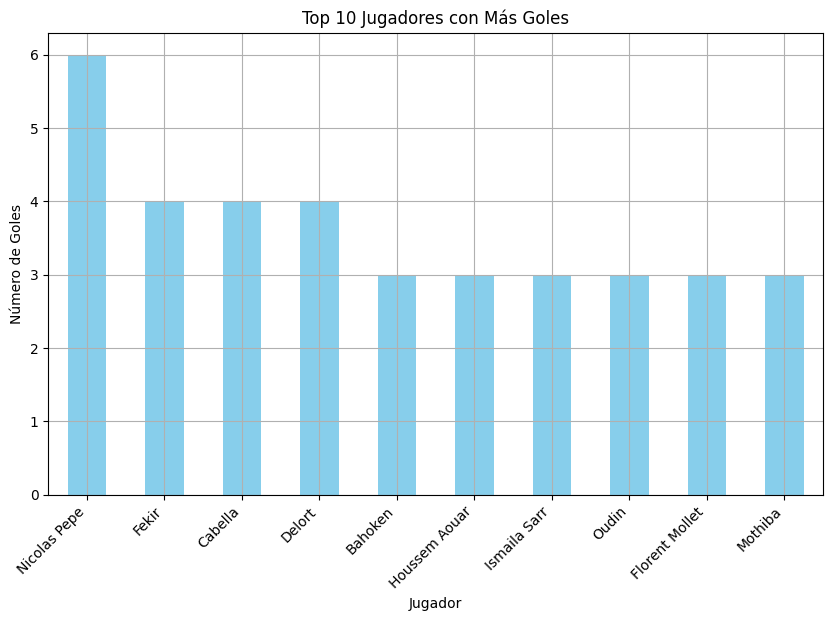

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df_goles

# Agrupar por jugador y contar el número de goles, luego seleccionar los 10 jugadores con más goles
goles_por_jugador = df_goles.groupby('jugador').size().sort_values(ascending=False).head(10)

# Mostrar los datos
print(goles_por_jugador)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
goles_por_jugador.plot(kind='bar', color='skyblue')
plt.title('Top 10 Jugadores con Más Goles')
plt.xlabel('Jugador')
plt.ylabel('Número de Goles')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Mostrar el gráfico
plt.show()




In [24]:
goles_por_jugador

,0
jugador,
Nicolas Pepe,6
Fekir,4
Cabella,4
Delort,4
Bahoken,3
Houssem Aouar,3
Ismaila Sarr,3
Oudin,3
Florent Mollet,3


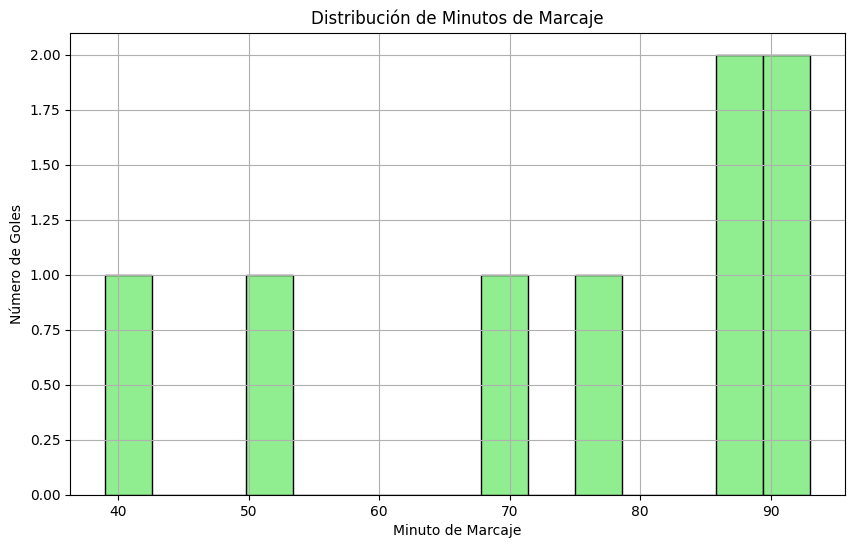

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un histograma de los minutos de marcaje
plt.figure(figsize=(10, 6))
plt.hist(df_goles['minuto_marcaje'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribución de Minutos de Marcaje')
plt.xlabel('Minuto de Marcaje')
plt.ylabel('Número de Goles')
plt.grid(True)

# Mostrar el gráfico
plt.show()

